In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import kmax as kx
import utility as util
from hierarchy import *

# Finding Tree Path Covers

In [2]:
def draw_tree(tree, layout, draw_path=True):
    rooted_tree = nx.bfs_tree(tree, 0)
    
    #nx.draw_networkx_nodes(tree, pos=layout, node_size=29)
    nx.draw_networkx_labels(tree, pos=layout, font_size=10, font_color="tab:blue")
    
    if draw_path:
        path_cover,_,X,_,_=util.path_cover(tree)
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=path_cover, edge_color="tab:red", arrows=True)
        
        other_edges = [(u,v) for u,v in rooted_tree.edges() if (u,v) not in path_cover and (v,u) not in path_cover]
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=other_edges)
    else:
        nx.draw_networkx_edges(rooted_tree, pos=layout)

### Bulk Testing with (0,1)-weights

In [3]:
failure_count = 0
bad_trees = []
for i in range(1000):
    n = 1000
    T = nx.random_labeled_tree(n)
    
    for s,t in T.edges():
        T[s][t]['weight'] = random.random()

    path, diff, _, _, _ = util.path_cover(T)
    if not math.isclose(diff, 0.0, abs_tol=1e-4):
        failure_count += 1
        bad_trees.append(T)

In [4]:
print(f'failures: {failure_count}')
bad_tree = bad_trees[0]
draw_tree(bad_tree, hierarchye_pos(bad_tree, 0), draw_path=False)

failures: 0


IndexError: list index out of range

In [ ]:
draw_tree(bad_tree, hierarchye_pos(bad_tree, 0))

In [ ]:
weights = nx.get_edge_attributes(bad_tree, 'weight')
for u,v in bad_tree.edges():
    if (u,v) in weights.keys():
        weights[(v,u)] = weights[(u,v)]
    elif (v,u) in weights.keys():
        weights[(u,v)] = weights[(v,u)]
        
for e in bad_tree.edges():
    print(f'{e}, {weights[e]}')

In [ ]:
path,diff,w0,z0,max_weights = util.path_cover(bad_tree)
print((path,diff,w0,z0))
print(sum(weights[e] for e in path))

In [ ]:
math.isclose(util.path_cover(bad_tree)[1],0.0,rel_tol=1e-4)

### Bad tree

In [3]:
bad_tree = nx.read_graphml('bad_tree.graphml', node_type=int)

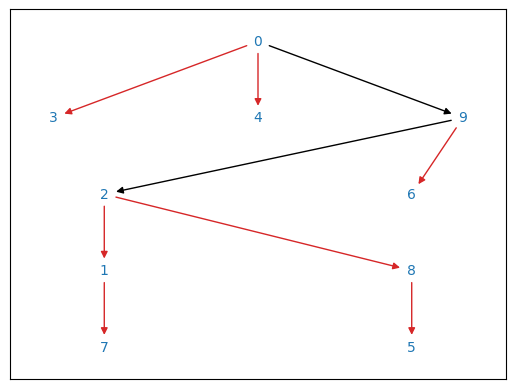

In [4]:
draw_tree(bad_tree, hierarchye_pos(bad_tree, 0))

In [5]:
path,diff,w0,z0,max_weights = util.path_cover(bad_tree)

In [6]:
max_weights

{3: (0, 0.8571378834743425, None, None),
 4: (0, 0.7427312715332887, None, None),
 6: (0, 0.6353259461792022, None, None),
 7: (0, 0.6853037458046903, None, None),
 5: (0, 0.7727704000821392, None, None),
 8: (0.7727704000821392, 0.6032519816840024, 5, None),
 1: (0.6853037458046903, 0.7038520740290093, 7, None),
 2: (2.765178201599841, -0.5226053659456441, 1, 8),
 9: (3.400504147779043, 0.5913968963252523, 6, 2),
 0: (5.000373302786674, 0.25726872846671134, 3, 4)}

### Test Tree 2

In [ ]:
test_tree2 = nx.read_graphml('test2.graphml', node_type=int)

In [ ]:
draw_tree(test_tree2, hierarchyc_pos(test_tree2, 0))

In [ ]:
nx.get_edge_attributes(test_tree2, 'weight')

### Test Tree 1 [(0,1)-weights]

In [ ]:
test_tree = nx.read_graphml('test1.graphml', node_type=int)

In [ ]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0), draw_path=False)

In [ ]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0))

In [ ]:
nx.get_edge_attributes(test_tree, 'weight')

### Random tree with edge weights in [0,1)

In [12]:
n = 30
tree = nx.random_labeled_tree(n)

for s,t in tree.edges():
    tree[s][t]['weight'] = random.random() # assign a random edge weight in [0,1)

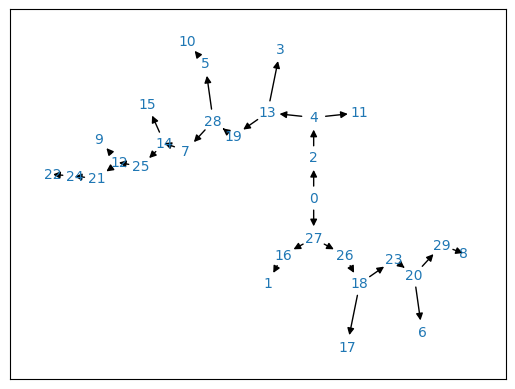

In [13]:
layout = hierarchyc_pos(tree, 0)
draw_tree(tree, layout, draw_path=False)

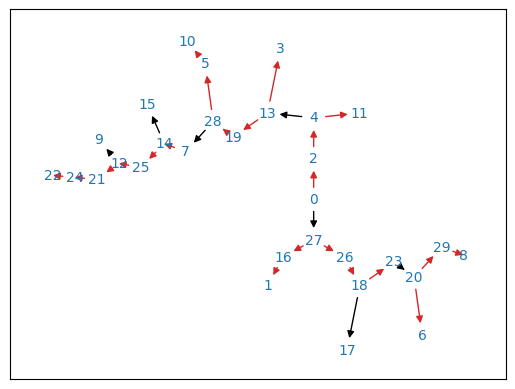

In [14]:
draw_tree(tree, layout)

In [15]:
nx.get_edge_attributes(tree, 'weight')

{(0, 2): 0.9911788596074214,
 (0, 27): 0.3716726360774052,
 (1, 16): 0.3046609076240775,
 (2, 4): 0.39851922408425955,
 (3, 13): 0.7883278468246712,
 (4, 11): 0.6436523088690348,
 (4, 13): 0.15786814688614215,
 (5, 10): 0.44511747343709407,
 (5, 28): 0.287620419610765,
 (6, 20): 0.3795437451261514,
 (7, 14): 0.6152192937256503,
 (7, 28): 0.2283364309376904,
 (8, 29): 0.4377580019338134,
 (9, 12): 0.4756087649618458,
 (12, 21): 0.5386100337425991,
 (12, 25): 0.6330681561391501,
 (13, 19): 0.28799889752689656,
 (14, 15): 0.4919284977554972,
 (14, 25): 0.8407479873651458,
 (16, 27): 0.9208957499557094,
 (17, 18): 0.146841882489384,
 (18, 26): 0.7244897626641777,
 (18, 23): 0.6269893356389612,
 (19, 28): 0.8639774944512337,
 (20, 23): 0.14489114055428354,
 (20, 29): 0.5339052625149956,
 (21, 24): 0.06843530118898089,
 (22, 24): 0.7631264452666762,
 (26, 27): 0.9515486705834515}

### Unit edge weights

In [9]:
n=10
ones_tree = nx.random_labeled_tree(n)
for s,t in ones_tree.edges():
    ones_tree[s][t]['weight'] = 1

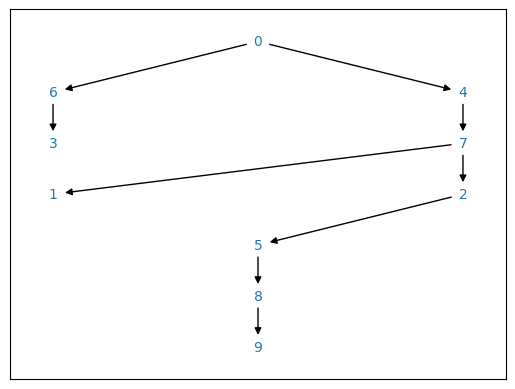

In [10]:
#ones_layout = nx.spring_layout(ones_tree)
ones_layout = hierarchye_pos(ones_tree, 0)
draw_tree(ones_tree, ones_layout, draw_path=False)

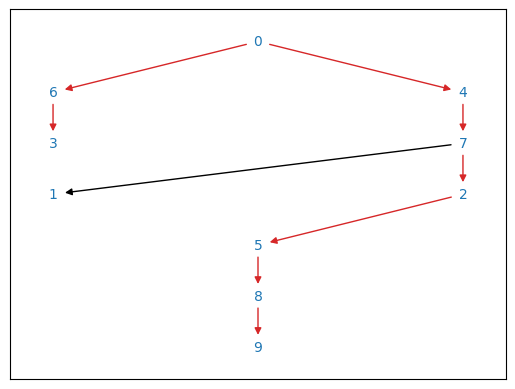

In [11]:
draw_tree(ones_tree, ones_layout)